In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
path = 'train_2015_12_2016_1.txt'
data = pd.read_csv(path,delimiter=',',header=None,names=['flavor','time_index','count'])
data.head()

,flavor,time_index,count
0,1,0,3
1,1,1,6
2,1,2,2
3,1,3,2
4,1,4,0


In [3]:
f1_train = data[data['flavor'] == 1][['time_index','count']]
f1_train.head()

,time_index,count
0,0,3
1,1,6
2,2,2
3,3,2
4,4,0


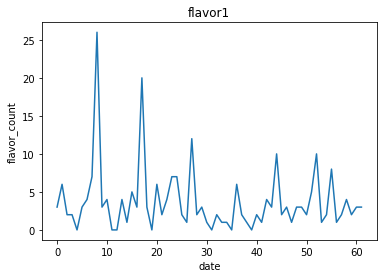

In [4]:
fig, ax = plt.subplots(1)
ax.plot(f1_train['time_index'],f1_train['count'])
ax.set_xlabel('date')
ax.set_ylabel('flavor_count')
ax.set_title('flavor1')

In [5]:
# 对数据去噪
q1 = f1_train['count'].quantile(0.25)
q3 = f1_train['count'].quantile(0.75)
upper_limit = q3 + 3 * (q3 - q1)
c_mean = f1_train['count'].mean()
upper_limit
q3+1.5*(q3-q1)
a = []
for i in range(len(f1_train['count'])):
    if f1_train['count'][i] < upper_limit:
        a.append(f1_train['count'][i])
a.sort()
# 非噪点最大两个值得平均
f1_train_remove = f1_train['count']
for i in range(len(f1_train_remove)):
    if f1_train_remove[i] >= upper_limit:
        #f1_train_remove[i] = (a[-1]+a[-2])/2.0
        f1_train_remove[i] = (f1_train_remove[i-1]+f1_train_remove[i+1])/2.0

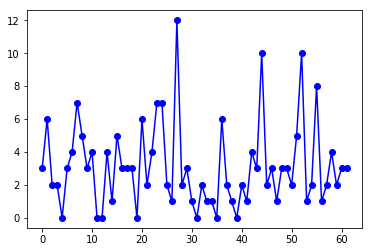

In [6]:
plt.figure()
plt.plot(np.arange(len(f1_train_remove)), f1_train_remove,'bo-')
plt.show()

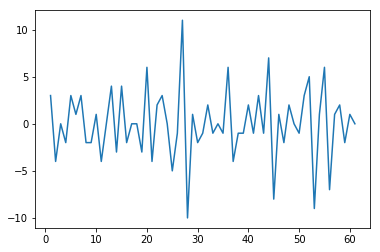

In [23]:
# 一阶差分
f1_train_diff = f1_train_remove.diff(1)
fig, ax = plt.subplots(1)
ax.plot(f1_train_diff)

In [ ]:
## 构造滞后矩阵，即使用前几天的差分预测后几天的值
f1_train_diff_new = f1_train_diff
new_train = pd.DataFrame()

for i in range(7,0,-1):

    new_train['t-'+str(i)] = f1_train_diff_new.shift(i)

new_train['t'] = f1_train_diff_new.values

print(new_train.head(20))

In [11]:
# 补上实际值
new_train['y'] = f1_train['count']
new_train.head(20)

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7
8,NaN,NaN,NaN,NaN,NaN,NaN,4.0,-1.0,5
9,NaN,NaN,NaN,NaN,NaN,4.0,-1.0,1.0,3
